# <center> Twitter's Climate Tide: An Analysis of Tweets About Climate Change </center>
## <center> By Arjun Gandhi </center>
## <center> December 20, 2020 </center>

!["Impacts of Climate Change (Source: NASA)"](climate_change.jpg)
#### <center>Impacts of Climate Change (https://climate.nasa.gov/effects/)</center>

# <center>Introduction</center>

# <center> Getting started </center>

### The libraries I will be using are: [matplotlib](https://matplotlib.org/index.html#), [pandas](https://pandas.pydata.org), [spaCy](https://spacy.io), [seaborn](https://seaborn.pydata.org), [Gensim](https://radimrehurek.com/gensim/), [wordcloud](http://amueller.github.io/word_cloud/), [scikit-learn](https://scikit-learn.org/stable/), and [VADER](https://github.com/cjhutto/vaderSentiment).
### Let's install everything I will need

In [1]:
# Wordcloud
#!pip install wordcloud

# Seaborn
#!pip install seaborn --upgrade
# Gensim
#!pip install --upgrade gensim

# Spacy
#!pip install -U spacy
#!pip install -U spacy-lookups-data
#!python -m spacy download en_core_web_sm

# VADER
#!pip install vaderSentiment

### Import everything needed

In [2]:
# Basics and essentials 
import pandas as pd
import string
import re
import datetime
import random

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
#import matplotlib 
from wordcloud import WordCloud

# Natural language processing and machine learning
import spacy
import gensim
# Vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Scikit-learn
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# <center> Data Collection </center>
I did not go and scrape Twitter to get all tweets that were on climate. Instead, I found a GWU dataset of climate change tweets that were collected from 2017-2019 (Littman, Justin; Wrubel, Laura, 2019, "Climate Change Tweets Ids", https://doi.org/10.7910/DVN/5QCCUU, Harvard Dataverse, V1). I downloaded my sample from GWU which makes picking your criteria for the tweets much easier. You can make your own data set from all 40 million right [here](https://tweetsets.library.gwu.edu/datasets).  Here is a link to my exact sample: http://tweetsets.library.gwu.edu/dataset/a66e1b6b. You can also see my sample in the form of the tweet ids in my GitHub repo: [arjungandhi521/arjungandhi521.github.io/public_data/tweets_25k.txt](https://github.com/arjungandhi521/arjungandhi521.github.io/blob/main/public_data/tweets_25k.txt). I sampled 25,000 of the 40 million tweets. The CSV I use directly below is private because of Twitter policy that one should not publish large amounts of tweets but that people in academics and such can go ahead and publisht the tweet ids. As states in the above link the data is from September 21, 2017 and May 17, 2019 and they had a gap in data collection from January 7, 2019 to April 17, 2019. I chose to exclude retweets and this sample ranges from late 2017 to mid-2019 which is the full collection time. I excluded retweets because even though a tweet with 1 billion RTs may have high influence on Twitter, having it n times in the dataset is not really going to add to my understanding of the language. I still have access to the favorites and retweets data which I will use later on. 

To convert each tweet ID into the actual tweet data I am using Hydrator: Hydrator [Computer Software]. Retrieved from https://github.com/docnow/hydrator. From the above repo, I downloaded [version 0.0.13 of the app](https://github.com/DocNow/hydrator/releases/tag/v0.0.13). I made a Twitter account to connect my account this Hydrator. When you download the sample just pick to download tweet ids. This will be a compressed .txt file. Just unzip it and then upload the file into Hydrator under "Datasets" in the desktop app. Then hit "Add Dataset" and then "Start" and then when its done you can click CSV to get the JSONL as a CSV. When I hydrated the tweets (turned them from tweet ids into tweets you see below), I started with 25,000 ids but the data frame directly below "only" has 18,328 tweets. This is for several reasons including people making their accounts private and deleted tweets and accounts. These tweet ids were put into the data set before these thing happend.

TALK ABOUT THEIR METHODOLOGY 

In [3]:
#data = pd.read_csv("./data/tweets_25K.csv")
data = pd.read_csv("./data/tweets_400k.csv")
data = data.sample(frac=1/4)
data 

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
250957,NaN,Sun Oct 08 21:01:26 +0000 2017,NaN,https://twitter.com/lucchaoui/status/917132855...,http://ift.tt/2wHhHtg,0,917132855171584000,NaN,NaN,NaN,...,160468,226,28,"Silicon Valley, CA",Luc Chaoui,lucchaoui,61814,NaN,http://www.linkedin.com/in/lchaoui,False
211515,NaN,Fri Dec 28 04:43:31 +0000 2018,NaN,NaN,NaN,0,1078511741376651264,NaN,NaN,NaN,...,4,1,1,NaN,FutureBot27,Grace75646541,40815,NaN,NaN,False
256920,NaN,Fri Mar 16 18:32:24 +0000 2018,climatechange,NaN,https://itunes.apple.com/us/podcast/today-expl...,6,974715018611691520,NaN,NaN,NaN,...,4280,1939,124,"Washington, DC",Julie Bogen,JaBogen,18305,NaN,http://www.theatlantic.com,True
211171,NaN,Fri Nov 10 03:58:52 +0000 2017,NaN,NaN,NaN,0,928834317316485120,SeattleWXGuy,9.287967e+17,592413865.0,...,1100,2659,13,"Kansas City, MO",David Drake,esparhawk,15526,NaN,NaN,False
253285,NaN,Tue Aug 07 15:59:20 +0000 2018,RenewableEnergy SolarTechnology SolarPower Cle...,NaN,https://cnb.cx/2O85G8x,1,1026860352523255808,NaN,NaN,NaN,...,664,468,17,Southern California,EcoDirect,EcoDirect_com,602,NaN,http://www.ecodirect.com,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21163,NaN,Mon Apr 09 21:10:10 +0000 2018,NaN,NaN,https://phys.org/news/2018-04-global-aviation-...,4,983452032861433856,NaN,NaN,NaN,...,5492,604,12,"Istanbul, Turkey",Av. Mustafa Güneş,avmustafagunes,4700,NaN,http://www.mgc.com.tr,False
43813,NaN,Tue Apr 23 06:02:40 +0000 2019,NaN,NaN,https://nyti.ms/2VZ8WY9,0,1120568651344691201,NaN,NaN,NaN,...,62,51,15,United States,rosemary eng,RengsecondEng,5674,NaN,NaN,False
67034,NaN,Sun Dec 09 14:53:41 +0000 2018,GlobalWarming,NaN,https://twitter.com/mikeseidel/status/10714621...,0,1071779925944750080,NaN,NaN,NaN,...,776,600,33,Dumdrudge,Matt,When2plus2is5,28999,NaN,NaN,False
262696,NaN,Tue Jan 23 09:06:36 +0000 2018,plantbreeding,NaN,https://www.agri-pulse.com/articles/10492-the-...,2,955728459799711744,NaN,NaN,NaN,...,2582,1045,59,UK,British Society of Plant Breeders (BSPB),_seedinnovation,3805,NaN,http://www.bspb.co.uk,False


As you can see, there is many columns. Most of these won't help me so many will have to go. Others need some fixing up to be useful like the date and time string need to be date objects.

# <center> Data Wrangling </center>
The data set has lots of data that is not needed for this analysis. Since we are looking at sentiment over time and other factors related to polticis of a state and events, it is simplest to just drop all non-English tweets.

There are lots of extranenous columns that are not relavent to this project so I just dropped them. These included geolocation data that was often missing, user information, and extranenous data about a tweet like time zone and lanague (since I drop all non-English ones to begin). These include things like user specifics like their profile details and other things like the URL of thr tweet or the language since all will be English. 

I followed this tutorial for help with tasks like lemmatization here and in the next section (EDA/Data Viz) making bags of words and word clouds.
https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/ 

## Remove non-English tweets and extraneous columns.

In [4]:
# Remove non-English tweets from the data set
data = data[data["lang"] == "en"]

# Drop all the unneeded columns from the data set
cols_to_delete = ["user_urls", "user_statuses_count", "coordinates", "user_name", "in_reply_to_status_id", 
                  "in_reply_to_user_id", "user_time_zone", "urls", "lang", "media", "source", 
                  "retweet_screen_name", "retweet_id", "possibly_sensitive", "tweet_url",
                  "user_default_profile_image", "user_friends_count", "user_verified", "user_location", 
                   "in_reply_to_screen_name", "user_screen_name.1",
                  "user_favourites_count", "user_listed_count", "user_created_at", "user_description", "place", 
                 "user_followers_count", "hashtags"]

data = data.drop(columns=cols_to_delete)

# Swap the index column from 0...n to the tweet ID and rename the column from id to tweetID and rename to clarify
# column meaning
data = data.rename(columns={"id": "tweetID", "created_at": "date/time", "user_screen_name": "tweeter"})
data = data.set_index('tweetID')
data

,date/time,favorite_count,retweet_count,text,tweeter
tweetID,,,,,
917132855171584000,Sun Oct 08 21:01:26 +0000 2017,0,0,"""You Can Help Mitigate Climate Change"" by Unkn...",lucchaoui
1078511741376651264,Fri Dec 28 04:43:31 +0000 2018,0,0,In 9 years from now trees will be underwater d...,Grace75646541
974715018611691520,Fri Mar 16 18:32:24 +0000 2018,6,3,"“If #climatechange is ravaging the military, a...",JaBogen
928834317316485120,Fri Nov 10 03:58:52 +0000 2017,0,0,"@guyinjeep16 @CatTheUndying Dude, those of us ...",esparhawk
1026860352523255808,Tue Aug 07 15:59:20 +0000 2018,1,0,"Over 5,500 churches in the UK embrace renewabl...",EcoDirect_com
...,...,...,...,...,...
983452032861433856,Mon Apr 09 21:10:10 +0000 2018,4,0,"Faced with global warming, aviation aims to tu...",avmustafagunes
1120568651344691201,Tue Apr 23 06:02:40 +0000 2019,0,0,Global Wealth Gap Would Be Smaller Today Witho...,RengsecondEng
1071779925944750080,Sun Dec 09 14:53:41 +0000 2018,0,0,#GlobalWarming in Texas. https://t.co/e9h3ifaGeb,When2plus2is5


## Combine the likes and retweets for total interaction score.

In [5]:
# Combine the number of favorites and retweets for a tweet into an total interactions score
total_interactions = []

for row in data.iterrows():
    tweet = row[1] 
    total = tweet["retweet_count"] + tweet["favorite_count"]
    total_interactions.append(total)

# Swap out the current RT and favorites columns for the total interactions columns
data["total_interactions"] = total_interactions
data = data.drop(columns=["retweet_count", "favorite_count"])
data.head()

,date/time,text,tweeter,total_interactions
tweetID,,,,
917132855171584000,Sun Oct 08 21:01:26 +0000 2017,"""You Can Help Mitigate Climate Change"" by Unkn...",lucchaoui,0
1078511741376651264,Fri Dec 28 04:43:31 +0000 2018,In 9 years from now trees will be underwater d...,Grace75646541,0
974715018611691520,Fri Mar 16 18:32:24 +0000 2018,"“If #climatechange is ravaging the military, a...",JaBogen,9
928834317316485120,Fri Nov 10 03:58:52 +0000 2017,"@guyinjeep16 @CatTheUndying Dude, those of us ...",esparhawk,0
1026860352523255808,Tue Aug 07 15:59:20 +0000 2018,"Over 5,500 churches in the UK embrace renewabl...",EcoDirect_com,1


## Convert the time/date strings into date objects using regular expressions.

In [6]:
# Convert the dates time strings into datetime objects
dates = []

# Matching this text
# Mon Jan 22 09:49:35 +0000 2018
# For every row in the dataframe
regex = re.compile(r"(\w{3}) (\w{3}) (\d\d) (\d\d:\d\d:\d\d) \+(0{4}) (\d{4})")

# Given a string of a month return the corresponding integer for that month i.e. Jan == 1
def numerize(str):
    month = str.lower()
    if (month == "jan"): return 1
    elif (month == "feb"): return 2
    elif (month == "mar"): return 3
    elif (month == "apr"): return 4
    elif (month == "may"): return 5
    elif (month == "jun"): return 6
    elif (month == "jul"): return 7 
    elif (month == "aug"): return 8
    elif (month == "sep"): return 9
    elif (month == "oct"): return 10
    elif (month == "nov"): return 11
    elif (month == "dec"): return 12
        
for row in data.iterrows():
    dt = row[1]["date/time"]
    matches = re.search(regex, dt)
    groups = matches.groups()    
    month = numerize(groups[1])
    d = datetime.date(int(groups[5]), month, int(groups[2]))
    dates.append(d)
    
data = data.drop(columns=["date/time"])
data["date_tweeted"] = dates
data.head()

,text,tweeter,total_interactions,date_tweeted
tweetID,,,,
917132855171584000,"""You Can Help Mitigate Climate Change"" by Unkn...",lucchaoui,0,2017-10-08
1078511741376651264,In 9 years from now trees will be underwater d...,Grace75646541,0,2018-12-28
974715018611691520,"“If #climatechange is ravaging the military, a...",JaBogen,9,2018-03-16
928834317316485120,"@guyinjeep16 @CatTheUndying Dude, those of us ...",esparhawk,0,2017-11-10
1026860352523255808,"Over 5,500 churches in the UK embrace renewabl...",EcoDirect_com,1,2018-08-07


## Prepare the tweets for sentiment analysis
There are several things that need to be done to the actual text of the tweets before we can do sentiment analysis on them. To starts of, I will do some basic things like make all tweet bodies lower case so that words like CLIMATE and climate and cLiMate are all treated the same by the model I use later on. Next, I am going to remove all links from these tweets because that is irrelvanet to the sentiment of the tweet. There are many things like this that I will do here then I will move on to make the tweets "linguistically sound" for analysis by doing things like removing words without meaning that won't contribute the analysis and then making all words their base word or lemmatizing them.

### Remove links

In [7]:
linkless = []
regex = re.compile(r"http\S+")

# remove all links from each tweet
for row in data.iterrows():
    txt = row[1]["text"]
    if txt.find("https://t.co"): 
        ll = re.sub(regex, "", txt)
        linkless.append(ll)
    else: 
        linkless.append(txt)

data["text"] = linkless
data.head()

,text,tweeter,total_interactions,date_tweeted
tweetID,,,,
917132855171584000,"""You Can Help Mitigate Climate Change"" by Unkn...",lucchaoui,0,2017-10-08
1078511741376651264,In 9 years from now trees will be underwater d...,Grace75646541,0,2018-12-28
974715018611691520,"“If #climatechange is ravaging the military, a...",JaBogen,9,2018-03-16
928834317316485120,"@guyinjeep16 @CatTheUndying Dude, those of us ...",esparhawk,0,2017-11-10
1026860352523255808,"Over 5,500 churches in the UK embrace renewabl...",EcoDirect_com,1,2018-08-07


### "Preprocess" the tweets
I will be using GenSim to do much of the natural langauge processing in this project. "Convert a document into a list of lowercase tokens, ignoring tokens that are too short or too long."
#### Tokenization
Tokenization a fundemental first step before you do anything in code with natural language to understand it. Tokenization is taking a piece of text like "Python is the best" and making into a list of the words that make up that text so here that would be ["Python", "is", "the", "best"]. You can find a more in-depth explanation of tokenization here if you're so interested: https://www.analyticsvidhya.com/blog/2020/05/what-is-tokenization-nlp/. Though I never explicity call something like tokenize(tweet), the preprocess function right here and the lemmatize later on are doing this. The reasons I do this twice is I want to clean up the tweet before I lemmatize (explained later) and lemmatize needs a string not a string list.

In [8]:
tweets = []
for r in data.iterrows():
    tweets.append(gensim.utils.simple_preprocess(r[1]["text"]))
    
data["tokens"] = tweets 
data.head()

,text,tweeter,total_interactions,date_tweeted,tokens
tweetID,,,,,
917132855171584000,"""You Can Help Mitigate Climate Change"" by Unkn...",lucchaoui,0,2017-10-08,"[you, can, help, mitigate, climate, change, by..."
1078511741376651264,In 9 years from now trees will be underwater d...,Grace75646541,0,2018-12-28,"[in, years, from, now, trees, will, be, underw..."
974715018611691520,"“If #climatechange is ravaging the military, a...",JaBogen,9,2018-03-16,"[if, climatechange, is, ravaging, the, militar..."
928834317316485120,"@guyinjeep16 @CatTheUndying Dude, those of us ...",esparhawk,0,2017-11-10,"[guyinjeep, cattheundying, dude, those, of, us..."
1026860352523255808,"Over 5,500 churches in the UK embrace renewabl...",EcoDirect_com,1,2018-08-07,"[over, churches, in, the, uk, embrace, renewab..."


### Stopwords and Lemmatization 
Here I will remove stopwards from the tweet bodies. These are words like "I" and "this" that add little meaning to the tweet but if left in the text will give me an innacurate depiction of the most common words in the tweets. Thne I will perform lemmatization on the tweets. This just means taking words that linguisticlly mean the same thing like walker and walking and reducing them to their base. In this case the word walk. You can read more here: https://en.wikipedia.org/wiki/Lemmatisation. 

In [9]:
# Load the model 
model = spacy.load('en_core_web_sm')

lemmatized = []
# Lemmatization of tweets and stopwords removal
for r in data.iterrows():
    tweet = r[1]["tokens"] # get tokens
    text = " ".join(tweet) # need as string to lemmatize
    lemmas = [tok.lemma_ for tok in list(model(text)) if (tok.is_stop==False)] # lematize
    lemmatized.append(lemmas) # save lemma tokens
    
data["tokens"] = lemmatized
data.head()

,text,tweeter,total_interactions,date_tweeted,tokens
tweetID,,,,,
917132855171584000,"""You Can Help Mitigate Climate Change"" by Unkn...",lucchaoui,0,2017-10-08,"[help, mitigate, climate, change, unknown, aut..."
1078511741376651264,In 9 years from now trees will be underwater d...,Grace75646541,0,2018-12-28,"[year, tree, underwater, global, warming, rage..."
974715018611691520,"“If #climatechange is ravaging the military, a...",JaBogen,9,2018-03-16,"[climatechange, ravage, military, military, co..."
928834317316485120,"@guyinjeep16 @CatTheUndying Dude, those of us ...",esparhawk,0,2017-11-10,"[guyinjeep, cattheundye, dude, know, climate, ..."
1026860352523255808,"Over 5,500 churches in the UK embrace renewabl...",EcoDirect_com,1,2018-08-07,"[church, uk, embrace, renewable, energy, renew..."


# <center> Exploratory Data Analysis and Data Visualization </center>

In this section, I will look at a number of aspects of the data. I will start off by just looking at when do people tweet about climate the most. Then I will do a number of word cloud visuazlaitons by things like year and peak times for tweeting about climate. To do these, I create bags of words and then sum over the rows so I make the word cloud using a one row data frame. Then I will look at the "length" of the tweet (normalzied for stopwords and semantically useless words). Finally, I will visualize a distribution of who is tweeting about climate as in how much are different people contributing to the data.

In addition to the I mentioned above (https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/), I also referenced here to make word cloud visualizations.

## Tweeting Frequency Over Time

### Add a year column to the dataframe

In [11]:
# To make splitting up the data frame up by time easier, I will add a year column to the tweet
years = []
for r in data.iterrows(): 
    years.append(r[1]["date_tweeted"].year)
data["year"] = years

### Obtain the metrics to visualzie frequency over tweeting over time

In [12]:
# Are there times where people tweet about climate change more than others?
# To make things simple lets look at the number of tweets per month year pair in the dataset
tweets_per_month = {}
# As you may recall data was collected from September 21, 2017 and May 17, 2019 and they had a gap in 
# data collection from January 7, 2019 to April 17, 2019.

# Initalize the value for a tuple key for the month/year pair to 0 for all months where data was collected
# 2017
for i in [9, 10, 11, 12]: 
    tweets_per_month[(i,2017)] = 0
# 2018
for i in range(1,13): 
    tweets_per_month[(i,2018)] = 0
# 2019
for i in [1, 4, 5]: 
    tweets_per_month[(i,2019)] = 0
    
# Iterate over data frame and add one to each tweet's proper month/year tuple's value
for r in data.iterrows():
    row = r[1]
    date = row["date_tweeted"]
    tweets_per_month[(date.month, date.year)] += 1
    
# Remove Septembr 2017 and January-April 2019 because most during most the month data was not collected
tweets_per_month.pop((9, 2017))
tweets_per_month.pop((1, 2019))
tweets_per_month.pop((4, 2019))
# I decided to also drop May 2019 from this visualization because if I leave it then there is a 5 month gap in
# data and this is not reflected in the plot.
tweets_per_month.pop((5, 2019))

# Convert the tuples to strings
time = list(tweets_per_month.keys())
count = list(tweets_per_month.values())

dates = []
for t in time: 
    dates.append(str(t[0]) + "/" + str(t[1])[-2:])

### Plot frequency of tweeting

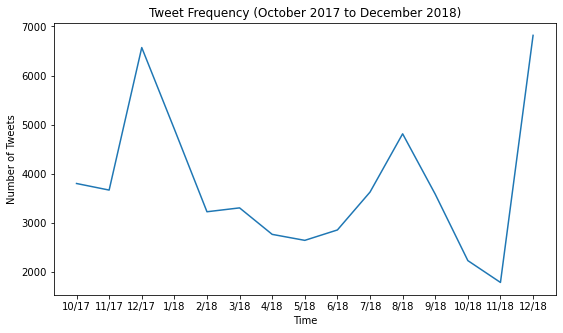

In [13]:
df = pd.DataFrame(columns = ['date', 'tweet_count'])
df['date'] = dates
df['tweet_count'] = count

dims = (9, 5)
fig, ax = plt.subplots(figsize=(9, 5))
plot = sns.lineplot(ax=ax, data=df, x=df['date'], y=df['tweet_count'])
plot = plot.set(title="Tweet Frequency (October 2017 to December 2018)",xlabel="Time",ylabel="Number of Tweets")

*THIS MAY NEED TO BE UPDATED BASED ON HOW THE GWU PEOPLE SAMPLED*

As you can see there were several time periods where the frequency of tweeting about climate was a bit higher than others, August and December 2018. I will look into these time periods a bit more below. Though, we can see that for the most part, people tweet a good amount about climate throughout the year and there really isn't one obvious patter that we can learn from this graph other than maybe people tweet alot about climate in the spring but again we are only looking at limited data so that inference is hard to make.

## Word Cloud Visualizations - need to fix so drops the exclude list

In [14]:
# SWITCH SO ALWAYS EXCLUDE THESE
# These were the terms used for collecting tweets, terms with space have been made into two elements and duplicates
# are remoevd
exclude = ["climatechange", "climatechangeisreal", "actonclimate", "globalwarming", 
                  "climatechangehoax", "climatedeniers", "climatechangeisfalse", "globalwarminghoax", 
                  "climatechangenotreal", "change", "global", "warming", "climate", "hoax"]
# drop the &amp column bc this is a not a word and shows up much in the word clouds and is HTML of &
# also drop search critera
#bow.drop(columns=["amp"], inplace=True)
exclude.append("amp")

# make bag of words
cv=CountVectorizer(analyzer='word')

# add a column with the text of each tweet as one string
tweets = []
for r in data.iterrows():
    tweets.append(" ".join(r[1]["tokens"]))
    
data["tweet"] = tweets
# don't need the text columns anymore
#data = data.drop(columns=["text"])

# define a function that takes in a data frame of tweets and returns a bag of words w/ the help of sklearn
def make_bag_of_words(tweets):
    info = cv.fit_transform(tweets["tweet"])
    bow = pd.DataFrame(info.toarray(), columns=cv.get_feature_names())
    bow.index=tweets.index
    #bow.drop(columns=exclude, inplace=True)
    return bow

# make a bag of words for each year i have data on
bags = []
for i in range(2017,2020): 
    bags.append(make_bag_of_words(data[data["year"] == i]))
    
# example output for 2019
bags[2].head()

,a_free_ride,a_liberty_rebel,a_nees_h,aa,aafc_canada,aag,aan_ath,aanthanurdc,aapg,aapnewswire,...,zzzz,ºc,áine,émission,חג,שמח,الجزائر,ジフン,朴志训,박지훈
tweetID,,,,,,,,,,,,,,,,,,,,,
1119275171695738880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1081154171385065472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1081484829617733632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1125267087948242946,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1124284177472544769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Shockingly, you probably aren't getting much insight from looking at this massisve matrix of mostly 0s. So lets create a function to take that data and make it into a word cloud!

### Write a functiont that makes a word cloud, given a bag of words

In [43]:
# I made a function that will display a word cloud give the word frequencies as a df
def make_word_cloud(freqs):
    wc = WordCloud(width=1000, height=800, max_words=40,colormap="Dark2").generate_from_frequencies(freqs.sum())
    plt.figure(figsize=(10,8))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

2017 Climate Change Tweets


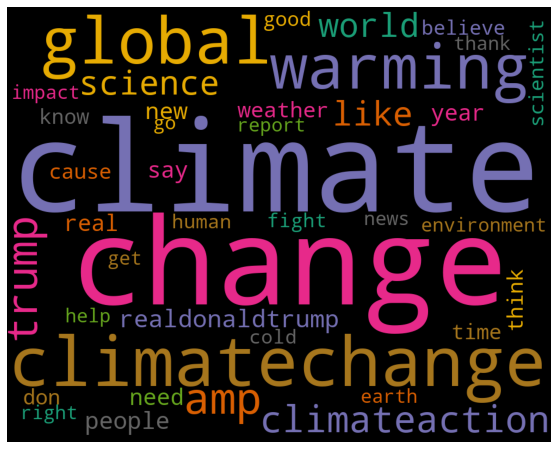

2018 Climate Change Tweets


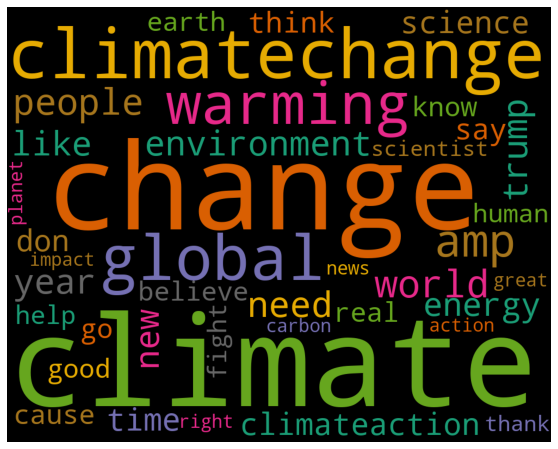

2019 Climate Change Tweets


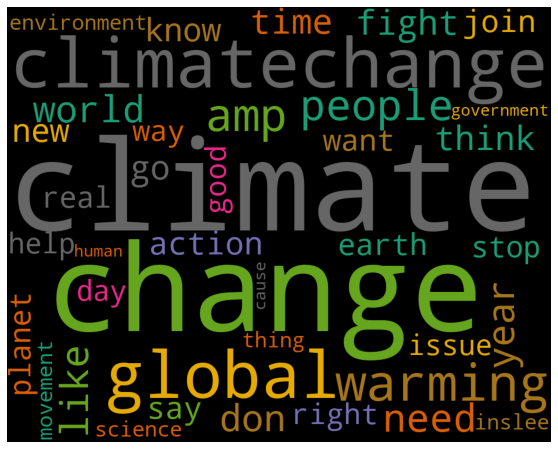

In [44]:
# Call make word cloud each bag of words summed so its one row for all tweets in that year (2017-19)
title = ["2017", "2018", "2019"]
for i in range(3): 
    print(title[i]+ " Climate Change Tweets")
    make_word_cloud(bags[i])

At a first glance, it does not look like the words people use to tweet about climate are all that different year over year. Its lots of "climate change", "#climatechagne", "global warming", "world", and different strings refering to President Trump. But do keep in mind the data from 2018 dominates that data set and we only have data from the start of 2019 and end of 2017.

### Word cloud of all data

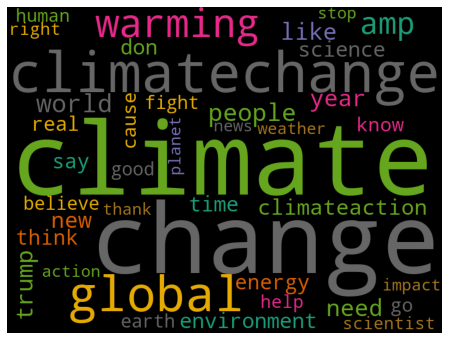

In [16]:
make_word_cloud(make_bag_of_words(data))

### Most interacted with tweets
Here I will use the WordCloud library to visualize the 1000 most interacted with tweets. I define an interaction as a favorite or retweet and I weighted them equally when I combined the two earlier.

Top 1000 Most Interacted With Tweets


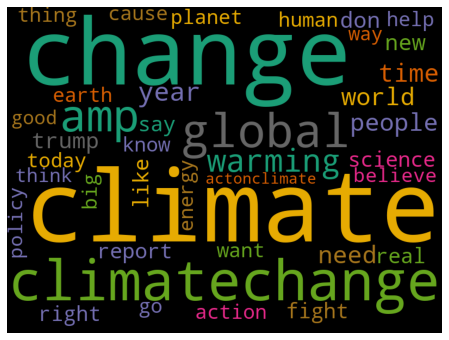

In [30]:
# Make a word count of the most interacted with tweets (what got the most likes and retweets)
data = data.sort_values(by=["total_interactions"], ascending=False)
top_1000 = data.head(1000)
print("Top 1000 Most Interacted With Tweets")
make_word_cloud(make_bag_of_words(top_1000))

It looks like the popular kids on Twitter are largely tweeting the same words as everyone else. Could be interesting later on to see if they have a different sentiment though?!

### During the peak times for climate on Twitter, what were people tweeting about? Was it a natural distaster, a political move, something else, or nothing special?

August 2018 Climate Change Tweets


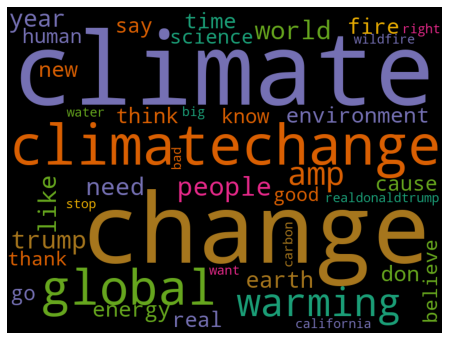

In [18]:
# I want to see what was "special" about these time frames so I will remove the words that are always most popular
#popular = ["climate", "change", "global", "warming", "climatechange"] # redefine
                  
# Make a word cloud for August 2018
# Ends of August 2018
aug1 = datetime.date(2018, 8, 1) 
aug31 = datetime.date(2018, 8, 31) 
# Get he df for august
eighteen = data[data["year"] == 2018] # 2018 df
aug_on = eighteen[eighteen["date_tweeted"] >= aug1]
aug2018 = aug_on[aug_on["date_tweeted"] <= aug31]
# Get the bow
bow_aug = make_bag_of_words(aug2018)#.drop(columns=search_critera)
# Call make word cloud
print("August 2018 Climate Change Tweets")
make_word_cloud(bow_aug) 

August is in one of California's wildfire seasons according and at that time this was [the most deadly and destructive fire season in California](https://en.wikipedia.org/wiki/2018_California_wildfires) so it makes a lot of sense that we see fire related terms in the August 2018 word cloud. 

December 2018 Climate Change Tweets


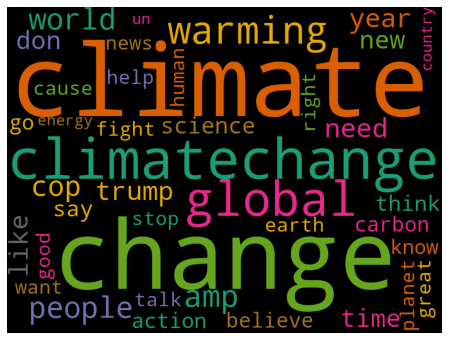

In [19]:
# Do the same for December 2018
start = datetime.date(2018, 12, 1) # start of december
december_2018 = eighteen[eighteen["date_tweeted"] >= start] # december 2018 df
# make bag of words and drop most popular terms
bow_d18 = make_bag_of_words(december_2018)#.drop(columns=popular) 
# make word cloud
print("December 2018 Climate Change Tweets")
make_word_cloud(bow_d18) 

Interesting, after looking through some headlines to see if I could find why the most dominant term here (Trump) was so dominant in this month specifically though after looking through the tweets about Trump from this month several were about the G-20 conference but not all.

## "Length" of Tweet

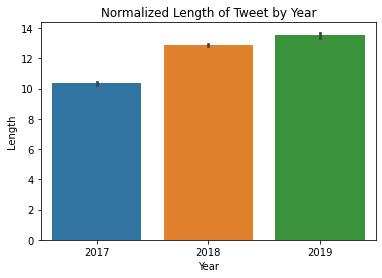

In [20]:
data['tweet_length']=data['tokens'].apply(lambda tokens: len(tokens))
plot = sns.barplot(x='year',y='tweet_length',data=data)
plot.set(title="Normalized Length of Tweet by Year",xlabel="Year",ylabel="Length")

# go ahead the drop the tweet length so df is more readable/short width later on
data = data.drop(columns=["tweet_length"])

Recall that the length of the Tweet that we are looking at here is approximate because we removed things like links (which are notably not words) and GenSim's preprocess() function removes very short and long words from the tweets to help me get the most semantically meanigful words from the tweets.

When looking at this graph one major thing to consider is that it may not be such a simple oh tweet length about climate must be going up year after year for a couple of reasons. One major factor is the sample from 2018 is much larger than the other two because the majority of data colleciton took place in 2018 and much of Jan-Apr 2019 lacked sampling. In 2019, GWU collected data the first week of January, not at all in Feb-Mar, the last two weeks of April, and most of May.

So roughly speaking we can say that tweet length may have increased when talking about tweets related to climate change but because of what I just said this is at best a rough guess because we aren't really saying massive changes in length for example between 2018 and 2019.

## Are we just seeing a few dominant voices on Twitter?
Lets look at the distribution of tweet count about climate to see if these most of these tweets are coming from a few tweeters.

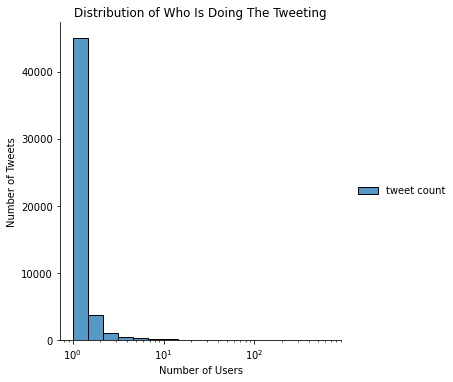

In [21]:
# set of tweeters 
tweeters = list(set(data["tweeter"]))
times_tweeted = dict.fromkeys(tweeters , 0)

# Calculate how many times each tweeter has tweeted
for r in data.iterrows():
    row = r[1]
    user = row["tweeter"]
    times_tweeted[user] += 1
    
# get key and values as lists
users = list(times_tweeted.keys())
counts = list(times_tweeted.values())

# put them in a dataframe
df = pd.DataFrame(columns = ['user', 'tweet count'])
df["user"] = users
df["tweet count"] = counts

# plot the distribution using displot in sns
plot = sns.displot(df, log_scale=True)
plot.set(title="Distribution of Who Is Doing The Tweeting", ylabel="Number of Tweets", xlabel="Number of Users")

Nearly every person in the data set has tweeted between 1-10 times about climate. This plot is very skewed (right). So we are NOT just seeing a few voiced but many voices on climate! 

# <center> Machine Learning and Sentiment Analysis </center>
For my section on machine learning I going to primarily focus on sentiment analysis. I will give a brief introduction to what that is but if you are interesting in learning more, I would reccommend that you check out these links that dive deeper and may explain it a bit better: https://towardsdatascience.com/sentiment-analysis-concept-analysis-and-applications-6c94d6f58c17, https://monkeylearn.com/sentiment-analysis/.

So what is sentiment analysis? On a basic level its looking at the words used in a piece of text like "Climate change is my favorite thing to tweet about 😍." and seeing if the text is neutral, positive, or negative. This example would likely be said to have positive sentiment based on the word favorite and the emoji if that was considered in the calculation.

Something to conisder here: ["U.S. adult Twitter users are younger and more likely to be Democrats than the general public"](https://www.pewresearch.org/internet/2019/04/24/sizing-up-twitter-users/). I do realize that every young Democrat cares about the planet but we need to consider this when looking at sentiment. This is sort of obvious later on when I looked at the number of positive vs number of negative tweets about climate that I can label based on the words used (directly below) because there are SO MANY more tweets that are positive that I am able to label about climate than the negative ones.

## Sentiment Analysis

### Assign each tweet an overall sentiment score 
Here I am using VADER and its compound sentiment analysis. The compound score combines the fraction of its neutral, positive, and negative sentiment into one sentiment score. The compound score will be between -1 (very negative) and +1 (very positive). You can read more about this in the read me of their repository on GitHub [here](https://github.com/cjhutto/vaderSentiment#about-the-scoring).

In [22]:
# Found vader from this article
# https://neptune.ai/blog/sentiment-analysis-python-textblob-vs-vader-vs-flair
# It's optimized for social network data and gets good results when using that sort of data
analyzer = SentimentIntensityAnalyzer()
sentiment_values = []

for r in data.iterrows():
    tweet = r[1]["tweet"]
    # returns the degree to which its positive/negative/netural and a compound score combining all of those
    scores = analyzer.polarity_scores(tweet)
    # store the compound score
    compound = scores["compound"]
    sentiment_values.append(compound)

data["sentiment_scores"] = sentiment_values

In [23]:
# I will use the guidlines for deciding if a tweet is positive/negative/neutral layed out by VADER here:
# https://github.com/cjhutto/vaderSentiment#about-the-scoring

sentiment_label = []

POSITIVE = 1
NEGATIVE = -1
NEUTRAL = 0

for val in sentiment_values:
    #positive sentiment: compound score >= 0.05
    if val >= 0.05:
        sentiment_label.append(POSITIVE)
    #neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
    elif (val > -0.05) and (val < .05):
        sentiment_label.append(NEUTRAL)
    #negative sentiment: compound score <= -0.05
    elif val <= -0.05:
        sentiment_label.append(NEGATIVE)

data["sentiment_label"] = sentiment_label
data.head()

,text,tweeter,total_interactions,date_tweeted,tokens,year,tweet,sentiment_scores,sentiment_label
tweetID,,,,,,,,,
1123675465774981120,“MPs have passed a motion making the UK parlia...,GretaThunberg,32991,2019-05-01,"[mps, pass, motion, make, uk, parliament, worl...",2019,mps pass motion make uk parliament world decla...,0.1779,1
1125936944813412352,Call your parents. 😉,AOC,31225,2019-05-08,[parent],2019,parent,0.0000,0
1035208001693470720,Climate change is seldom far from my mind. It'...,DanRather,25939,2018-08-30,"[climate, change, seldom, far, mind, cause, re...",2018,climate change seldom far mind cause real dama...,-0.9323,-1
1069582365306093568,"""The world's people have spoken... time is run...",Channel4News,17898,2018-12-03,"[world, people, speak, time, run, sir, david, ...",2018,world people speak time run sir david attenbor...,0.5106,1
1079411765237170176,Good for @chucktodd and @MeetThePress. Hope ot...,jonfavs,14716,2018-12-30,"[good, chucktodd, meetthepress, hope, outlet, ...",2018,good chucktodd meetthepress hope outlet follow...,0.7003,1


### Sentiment Distribution Across All Data

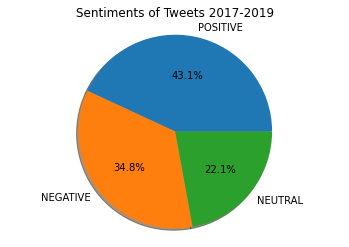

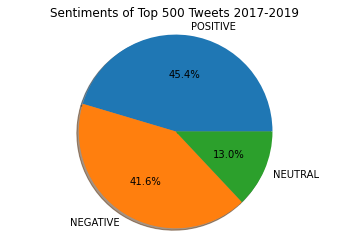

In [24]:
# A function to pie graph the sentiment of the tweets in a data frame, takes in a df and a graph title
def graph_sentiment(df, title): 
    labels = 'POSITIVE', 'NEGATIVE', 'NEUTRAL'
    sizes = [len(df[df["sentiment_label"] == POSITIVE].index), len(df[df["sentiment_label"] == NEGATIVE].index), 
         len(df[df["sentiment_label"] == NEUTRAL].index)]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels,autopct='%1.1f%%',shadow=True)
    plt.title(label=title)
    ax1.axis('equal')
    plt.show()
    
# Plot all tweets' sentiment
graph_sentiment(data,"Sentiments of Tweets 2017-2019")

# Lets look at sentiment of the top 1000 tweets compared to the overall
top_1000 = data.sort_values(by=["total_interactions"], ascending=False).head(1000)
graph_sentiment(top_500,"Sentiments of Top 500 Tweets 2017-2019")

## Machine Learning
I will be following this tutorial on how to work with text data and do ML with it: https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html.

### Tranform documents into feature vectors
Explain this.

In [25]:
# Transform the documents to feature vectors
count_vect = CountVectorizer()
# Train with 80% of the data
training_data = data.sample(frac=8/10) 

# Learns vocab used in training tweets, returns document term matrix
# same as fitting then transforming
# but slightly more efficent
X_train_counts = count_vect.fit_transform(training_data["tweet"])

# Test it out with a common word in the data set
print("The word climate is used", count_vect.vocabulary_.get(u'climate'), "times in all the training tweets.")

The word climate is used 9554 times in all the training tweets.


### TF-IDF

In [26]:
# fit estimator to data
tfidf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts) 
# transform the count matrix into a tf-idf representation
X_train_tfidf = tfidf_transformer.transform(X_train_counts) 
print("The shape of the the TF-IDF matrix is",X_train_tfidf.shape)

The shape of the the TF-IDF matrix is (54006, 58999)


### Training a classifier (NB)

In [27]:
# Train the classifier
clf = MultinomialNB().fit(X_train_tfidf, training_data["sentiment_label"])

# Build a df of test data that is not in training data
df = data.copy().drop(training_data.index)
X_test= df["tweet"]

X_new_counts = count_vect.transform(X_test)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)
predicted = clf.predict(X_new_tfidf)

# function to Print the first 10 predicted sentiments with the corresponding tweet
def print_predictions(X_test, predicted):
    for (tweet, sentiment) in zip(X_test[:10], predicted[:10]):
        result = ""
        # matche the sentiment integer to its meaning
        if sentiment == POSITIVE:
            result += "Positive: " 
        elif sentiment == NEGATIVE:
            result += "Negative: " 

        elif sentiment == NEUTRAL:
            result += "Neutral: "
        result += tweet
        print(result+"\n")
        
print_predictions(X_test, predicted)

Negative: hot summer intense winter storm textbook climate change phenomenon got work anticipate problem avoid head wrong direction right

Negative: house dem begin card gun climate immigrant early target swalwell say

Positive: fight climate change put price pollution give money right canadian remember claim climate action incentive file taxis year

Positive: catch charles moore bbcqt tonight dismiss climate change want write global warming policy foundation trustee express discontent address tufton st westminster london sw ql

Positive: young activist like gretathunberg lead way role model study show student shift elder attitude climatechange sciam

Negative: sigh deny obtuse dishonesty think real consistently distort ignore actual argument oh ad stat doesn think

Positive: interested believe climatechange interested believe oxygen mo firevicky votethemout

Positive: today sask_ndp ask check fed sk climate change plan approval work sk people fed want carbon tax ndp check fed want sta

After looking through these predictions, I know that they are not great because they are never predicitng a neutral tweet which is problematic as in reality, a tweet is neutral 22% of the time.

### What about a random forest?

In [28]:
# use sklearn's Pipline class to classify tweets with a random forest
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', RandomForestClassifier()),
 ])
text_clf.fit(training_data["tweet"], training_data["sentiment_label"])
predicted = text_clf.predict(X_test)

print_predictions(X_test, predicted)

Negative: hot summer intense winter storm textbook climate change phenomenon got work anticipate problem avoid head wrong direction right

Negative: house dem begin card gun climate immigrant early target swalwell say

Negative: fight climate change put price pollution give money right canadian remember claim climate action incentive file taxis year

Positive: catch charles moore bbcqt tonight dismiss climate change want write global warming policy foundation trustee express discontent address tufton st westminster london sw ql

Positive: young activist like gretathunberg lead way role model study show student shift elder attitude climatechange sciam

Negative: sigh deny obtuse dishonesty think real consistently distort ignore actual argument oh ad stat doesn think

Positive: interested believe climatechange interested believe oxygen mo firevicky votethemout

Positive: today sask_ndp ask check fed sk climate change plan approval work sk people fed want carbon tax ndp check fed want sta

Better! It does predict neutral tweets sometimes.

# <center> Insight </center>

# <center> Acknowledgements </center>
I would like to thank the George Washington University's TweetSets organization for their data set on climate change on Twitter. Their data and website to sample the data set made this project so much easier. Once again all of their data sets from Twitter can be found right [here](https://tweetsets.library.gwu.edu).

I would also like to thank the UMD CS Prof. John Dickerson and his CMSC320 instructional staff for their help and advice while working on this project.